In [1]:
import numpy as np
import pandas as pd
import json # java script object notation
import seaborn as sns

In [2]:
data=pd.read_csv('/Users/abhijeetkashyap/Desktop/athlete_events.csv')

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## basic 

In [4]:
data.shape

(271116, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [8]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
data['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

# distrubution of medal

/Users/abhijeetkashyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medal', ylabel='count'>

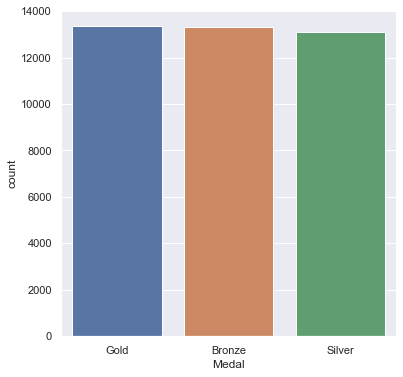

In [10]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data['Medal'])

## distrubution of medal country wise

In [11]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [12]:
data['Team'].isnull().sum()

0

In [13]:
data['Medal'].isnull().sum()

231333

In [14]:
data.dropna(subset='Medal',inplace=True)

In [15]:
data['Medal'].isnull().sum()

0

## which country won how many gold medals

In [16]:
data['Team'].nunique() # 1184 countries get participated in olympics

498

In [17]:
gd_df=data[data['Medal']=='Gold']

In [18]:
l=[]
name=[]
for i in gd_df['Team'].unique():
    ct=0
    for j in gd_df['Team']:
        if i==j:
            ct+=1
    l.append(ct)
    name.append(i)
for i in range(len(l)):
    if l[i]==max(l):
        j=i
    print(name[i],'win',l[i],'gold medals')
   

Denmark/Sweden win 6 gold medals
Finland win 198 gold medals
Norway win 299 gold medals
Taifun win 5 gold medals
France win 455 gold medals
Belarus win 24 gold medals
Cameroon win 20 gold medals
Spain win 108 gold medals
Italy win 535 gold medals
United States win 2474 gold medals
Pakistan win 42 gold medals
Soviet Union win 1058 gold medals
Uzbekistan win 10 gold medals
Azerbaijan win 7 gold medals
Unified Team win 123 gold medals
Japan win 247 gold medals
Canada win 422 gold medals
Vesper Boat Club win 18 gold medals
Ethiopia win 22 gold medals
Bulgaria win 54 gold medals
Hungary win 432 gold medals
Great Britain win 519 gold medals
Jordan win 1 gold medals
Sweden win 451 gold medals
New Zealand win 85 gold medals
Switzerland-1 win 20 gold medals
Argentina win 91 gold medals
Germany win 679 gold medals
Brazil win 103 gold medals
France-1 win 4 gold medals
Romania win 161 gold medals
Netherlands win 277 gold medals
Large boat, Central Naval Prep School "Poros"-1 win 17 gold medals
Cub

In [19]:
print(name[j],'win maximum',l[j],'gold medals')

United States win maximum 2474 gold medals


In [20]:
data['Team'].unique()

array(['Denmark/Sweden', 'Finland', 'Norway', 'Netherlands', 'Taifun',
       'France', 'Italy', 'Spain', 'Azerbaijan', 'Russia', 'Belarus',
       'Cameroon', 'United States', 'Hungary', 'Thessalonki-1',
       'Australia', 'Iran', 'Canada', 'Pakistan', 'Soviet Union',
       'Uzbekistan', 'Tajikistan', 'Unified Team', 'Japan', 'Ethiopia',
       'Switzerland', 'East Germany', 'Fornebo', 'Vesper Boat Club',
       'Sweden', 'South Africa', 'Turkey', 'Bulgaria', 'Egypt',
       'Great Britain', 'Jordan', 'Romania', 'Puerto Rico', 'Mexico',
       'Ghana', 'Morocco', 'New Zealand', 'Germany', 'Switzerland-1',
       'Switzerland-2', 'Argentina', 'Cuba', 'Uruguay', 'Poland',
       'Czechoslovakia', 'Nigeria', 'Brazil', 'France-1', 'Germany-2',
       'Austria', 'Lithuania', 'Stella-2', 'United States-1',
       'Large boat, Central Naval Prep School "Poros"-1', 'Indonesia',
       'Indonesia-1', 'Germany-1', 'Lucky Girl-1', 'Mutafo', 'Chile',
       'Great Britain-1',
       'Union des 

## distrubution of medal in country India

In [21]:
data[data['Team']=='India'].isnull().sum()

ID         0
Name       0
Sex        0
Age       19
Height    79
Weight    99
Team       0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
dtype: int64

In [22]:
ind_df=data[data['Team']=='India']

In [23]:
ind_df.shape

(197, 15)

## we have 1400 rows out of 1203 are having null values 

In [24]:
gd_df=data[data['Medal']=='Gold']

In [25]:
gd_df['Team'].nunique()

242

In [26]:
gd_df.isnull().sum()

ID           0
Name         0
Sex          0
Age        148
Height    2833
Weight    3118
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

## distrubution of age with gold medal

In [27]:
gold_df=data[data['Medal']=='Gold']

In [28]:
gold_df['Age'].nunique()

50

In [29]:
gold_df['Age'].isnull().sum() # having 148 nan values

148

In [30]:
gold_df.dropna(subset=['Age'],inplace=True) # droping value of rows by columns selection

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_1402/810250720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_df.dropna(subset=['Age'],inplace=True) # droping value of rows by columns selection


In [31]:
gold_df['Age'].isnull().sum()

0

In [32]:
gold_df['Age'].nunique()

50

In [33]:
gold_df['Medal'].isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

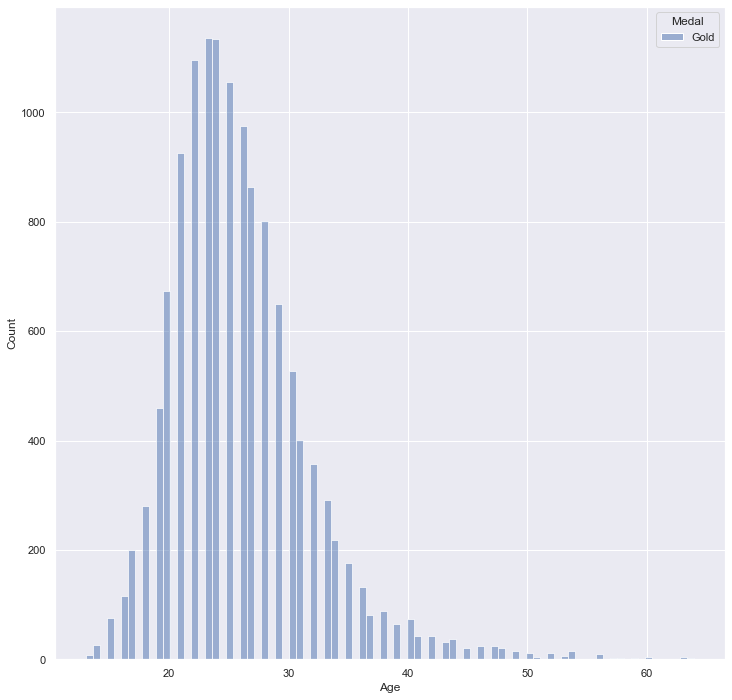

In [34]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,12)})
sns.histplot(x='Age',hue='Medal',data=gold_df,color='blue')

# which sport is most played by 50+ player

In [35]:
age_df=data[data['Age']>=50]

In [36]:
age_df.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    175
Weight    177
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [37]:
age_df.groupby('Sport').count()['Age']

Sport
Alpinism             1
Archery             34
Art Competitions    37
Croquet              2
Curling              4
Equestrianism       53
Fencing              3
Golf                 1
Roque                2
Rowing               3
Sailing             46
Shooting            50
Name: Age, dtype: int64

<AxesSubplot:xlabel='Sport'>

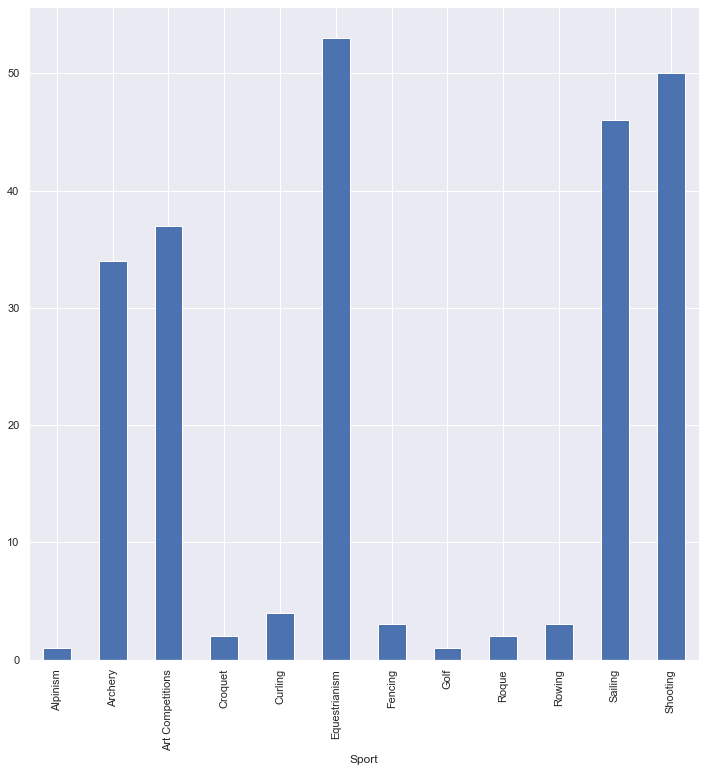

In [38]:
age_df.groupby('Sport').count()['Age'].plot(kind='bar')

In [39]:
age_df.groupby('Age').count()['Sport']# which age category paly most no of sports

Age
50.0    33
51.0    22
52.0    35
53.0    19
54.0    26
55.0    14
56.0    20
57.0     7
58.0    12
59.0     6
60.0    12
61.0     6
63.0     9
64.0     3
65.0     1
66.0     2
68.0     2
69.0     2
71.0     2
72.0     2
73.0     1
Name: Sport, dtype: int64

## which gender have more medals

<AxesSubplot:ylabel='Medal'>

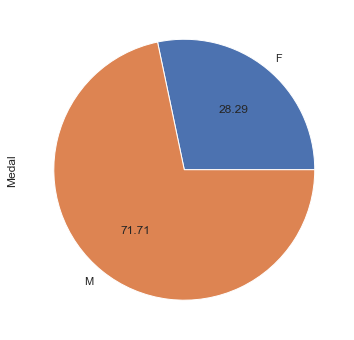

In [40]:
data.groupby('Sex').count()['Medal'].plot(kind='pie',autopct='%.2f',figsize=(6,6))

<AxesSubplot:title={'center':'gold distrubution gender viz'}, ylabel='Medal'>

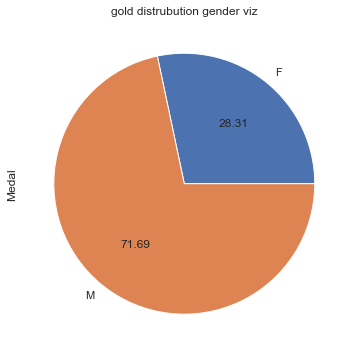

In [41]:
gold_df.groupby('Sex').count()['Medal'].plot(kind='pie',title='gold distrubution gender viz',figsize=(6,6),autopct='%.2f')

## which sports brings more medal to team

In [42]:
dicti=dict(data.groupby('Sport').count()['Medal'])

In [43]:
ct=0
for sportname in dicti.keys():
      if ct < dicti[sportname]:
            ct=dicti[sportname]
            game=sportname
print(game,ct)    

Athletics 3969


## BMI of players who won gold medal

In [44]:
data.isnull().sum()

ID           0
Name         0
Sex          0
Age        732
Height    8711
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [46]:
data['Sport'].nunique()

66

In [47]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [58]:
h_df=gold_df.dropna(subset='Height')

In [59]:
h_w=gold_df.dropna(subset='Weight')

In [60]:
sum=0
for h in h_df['Height']:
        sum+=h
print(sum)        
avgheight=sum/len(h_df['Height'])        

1873667.0


In [61]:
sum1=0
for h in h_w['Weight']:
        sum1+=h
print(sum1)        
avgWeight=sum/len(h_w['Weight'])  

760252.5


In [62]:
print(sum1/sum**2)

2.1655740630365505e-07


In [ ]:
gold_df.columns

## yearwise anyalsis

In [63]:
data['Year'].nunique()

35

<AxesSubplot:title={'center':'yr wise anylasis'}, xlabel='Year'>

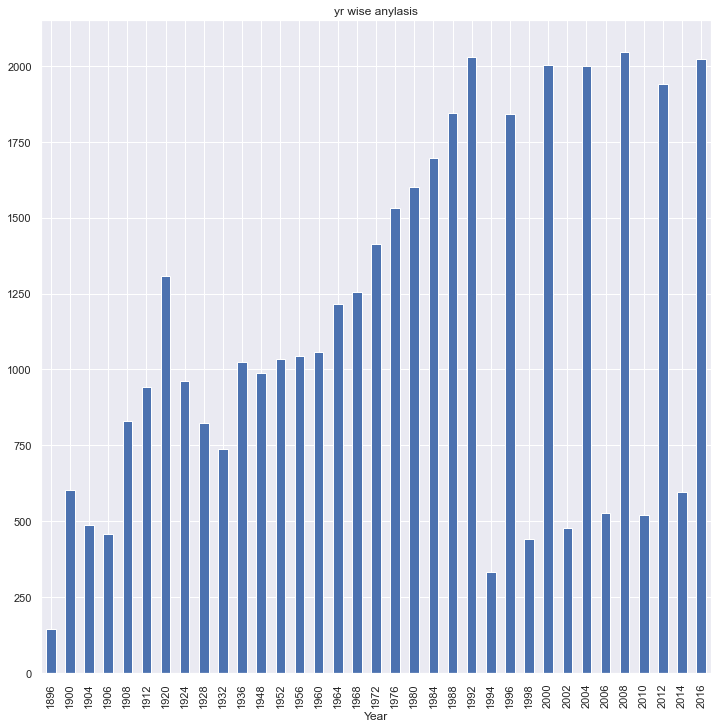

In [65]:
data.groupby('Year').count()['Medal'].plot(kind='bar',title='yr wise anylasis',figsize=(12,12))

## in which yr how many medal won by invidual country

In [71]:
for i in data['Year'].unique():
    h_yr=data[data['Year']==i]
    cm=h_yr.groupby('Team').count()['Medal']
    print('In yr',i,cm)
                   
                   
                   
                   

In yr 1900 Team
A North American Team            4
Amateur Athletic Association     5
Aschenbrodel                     8
Australia                        5
Austria                          6
                                ..
United States/France             2
United States/Great Britain      2
Univ. of Brussels               11
Upton Park FC                   11
Vesper Boat Club                 9
Name: Medal, Length: 88, dtype: int64
In yr 1920 Team
Ancora               4
Antwerpia V          5
Atlanta              9
Australia            7
Beatrijs III-1       3
Belgium            177
Boreas-2             2
Brazil               7
Canada              16
Czechoslovakia      10
Denmark             71
Edelweiss II-1       3
Eleda                7
Elsie                4
Estonia              3
Finland             52
Fornebo              4
France             134
France-3             4
Great Britain      101
Great Britain-1      2
Great Britain-2      2
Great Britain-3      2
Greece          

In [75]:
li=[]
for i in data['Year'].unique():
    h_yr=data[data['Year']==i]
    for j in h_yr['Team'].unique():
        h_yr_team=h_yr[h_yr['Team']==j]
        cmt=h_yr_team['Medal'].count()
        print('In yr',i,j,'won',cmt,'medal')
   
    
                   
                   

In yr 1900 Denmark/Sweden won 6 medal
In yr 1900 United States won 45 medal
In yr 1900 Vesper Boat Club won 9 medal
In yr 1900 Union des Socits Franais de Sports Athletiques won 29 medal
In yr 1900 Martha-1 won 8 medal
In yr 1900 USFSA won 13 medal
In yr 1900 Favorite Hammonia-3 won 6 medal
In yr 1900 Frankfurt Club won 15 medal
In yr 1900 Norway won 9 medal
In yr 1900 France won 75 medal
In yr 1900 Great Britain won 22 medal
In yr 1900 Carabinier-15 won 1 medal
In yr 1900 Racing Club de France won 11 medal
In yr 1900 Crabe II-1 won 5 medal
In yr 1900 Crabe II-4 won 5 medal
In yr 1900 Nina Claire-2 won 4 medal
In yr 1900 Hungary won 5 medal
In yr 1900 Moseley Wanderers won 15 medal
In yr 1900 Devon and Somerset Wanderers won 12 medal
In yr 1900 Amateur Athletic Association won 5 medal
In yr 1900 Foxhunters Hurlingham won 5 medal
In yr 1900 Tritons Lillois-2 won 5 medal
In yr 1900 Esterel-1 won 2 medal
In yr 1900 Olle won 6 medal
In yr 1900 Switzerland won 15 medal
In yr 1900 Netherland

In yr 2002 Italy-1 won 2 medal
In yr 2002 Belarus won 1 medal
In yr 2002 United States-1 won 6 medal
In yr 2002 Germany-1 won 4 medal
In yr 2002 Croatia won 4 medal
In yr 2002 Estonia won 3 medal
In yr 2002 Poland won 2 medal
In yr 2002 Czech Republic won 3 medal
In yr 2002 Bulgaria won 3 medal
In yr 2002 Canada-1 won 2 medal
In yr 2002 Japan won 2 medal
In yr 2002 China-1 won 2 medal
In yr 2006 Norway won 23 medal
In yr 2006 Russia won 33 medal
In yr 2006 Germany won 44 medal
In yr 2006 Canada won 67 medal
In yr 2006 United States-1 won 4 medal
In yr 2006 Finland won 41 medal
In yr 2006 Sweden won 64 medal
In yr 2006 South Korea won 19 medal
In yr 2006 Italy won 21 medal
In yr 2006 Switzerland-1 won 6 medal
In yr 2006 Japan won 1 medal
In yr 2006 France won 15 medal
In yr 2006 Czech Republic won 27 medal
In yr 2006 Switzerland won 15 medal
In yr 2006 Australia won 2 medal
In yr 2006 Austria won 28 medal
In yr 2006 United States won 48 medal
In yr 2006 Canada-1 won 2 medal
In yr 2006 B

In yr 1912 Taifun won 5 medal
In yr 1912 Sweden won 153 medal
In yr 1912 Norway won 55 medal
In yr 1912 United States won 107 medal
In yr 1912 Austria won 14 medal
In yr 1912 Lucky Girl-1 won 5 medal
In yr 1912 Great Britain-1 won 2 medal
In yr 1912 Heatherbell won 7 medal
In yr 1912 Nykjbings paa Falster won 5 medal
In yr 1912 Italy won 25 medal
In yr 1912 Denmark won 74 medal
In yr 1912 Magda IX won 10 medal
In yr 1912 Belgium won 19 medal
In yr 1912 Great Britain won 128 medal
In yr 1912 Hungary won 30 medal
In yr 1912 Ludwigshafener Ruderverein won 5 medal
In yr 1912 Finland won 52 medal
In yr 1912 Kerstin-1 won 3 medal
In yr 1912 Berliner Ruderverein von 1876-2 won 9 medal
In yr 1912 Germany won 39 medal
In yr 1912 Great Britain-2 won 4 medal
In yr 1912 Gallia II won 7 medal
In yr 1912 Thames Rowing Club won 5 medal
In yr 1912 Erna Signe won 10 medal
In yr 1912 Polyteknisk Roklub-1 won 5 medal
In yr 1912 Nina won 7 medal
In yr 1912 Ormsund Roklub-2 won 5 medal
In yr 1912 Russia wo

In yr 2000 Trinidad and Tobago won 2 medal
In yr 2000 Croatia won 10 medal
In yr 2000 Bahamas won 11 medal
In yr 2000 Estonia won 3 medal
In yr 2000 China won 65 medal
In yr 2000 Belgium won 7 medal
In yr 2000 Chinese Taipei won 5 medal
In yr 2000 France-1 won 2 medal
In yr 2000 Australia-1 won 2 medal
In yr 2000 Slovenia won 3 medal
In yr 2000 Iran won 4 medal
In yr 2000 Portugal won 2 medal
In yr 2000 Latvia won 3 medal
In yr 2000 Iceland won 1 medal
In yr 2000 South Korea won 67 medal
In yr 2000 China-2 won 8 medal
In yr 2000 China-1 won 6 medal
In yr 2000 Austria won 4 medal
In yr 2000 Moldova won 2 medal
In yr 2000 Indonesia won 6 medal
In yr 2000 South Korea-2 won 2 medal
In yr 2000 Finland won 5 medal
In yr 2000 Indonesia-1 won 2 medal
In yr 2000 South Africa won 5 medal
In yr 2000 Czech Republic won 7 medal
In yr 2000 Slovakia won 6 medal
In yr 2000 Macedonia won 1 medal
In yr 2000 Sri Lanka won 1 medal
In yr 2000 Czech Republic-1 won 2 medal
In yr 2000 North Korea won 4 medal


In yr 1972 Iran won 3 medal
In yr 1972 Cuba won 22 medal
In yr 1972 Ghana won 1 medal
In yr 1972 East Germany-1 won 6 medal
In yr 1972 Norway won 25 medal
In yr 1972 Poland won 47 medal
In yr 1972 Australia won 20 medal
In yr 1972 Bulgaria won 22 medal
In yr 1972 Japan won 59 medal
In yr 1972 Italy won 28 medal
In yr 1972 Yugoslavia won 18 medal
In yr 1972 Sweden won 26 medal
In yr 1972 Kenya won 12 medal
In yr 1972 West Germany won 102 medal
In yr 1972 Netherlands won 15 medal
In yr 1972 Switzerland won 19 medal
In yr 1972 West Germany-1 won 8 medal
In yr 1972 Hungary won 81 medal
In yr 1972 Czechoslovakia won 49 medal
In yr 1972 Colombia won 3 medal
In yr 1972 Great Britain won 29 medal
In yr 1972 France won 25 medal
In yr 1972 India won 14 medal
In yr 1972 Finland won 20 medal
In yr 1972 Italy-1 won 6 medal
In yr 1972 East Germany-2 won 2 medal
In yr 1972 Switzerland-1 won 6 medal
In yr 1972 Canada won 12 medal
In yr 1972 New Zealand won 14 medal
In yr 1972 Niger won 1 medal
In yr 1

In yr 1908 Gyrinus-1 won 6 medal
In yr 1908 Finland won 30 medal
In yr 1908 Bohemia won 6 medal
In yr 1908 South Africa won 2 medal
In yr 1908 Vinga-1 won 5 medal
In yr 1908 Sorais-2 won 5 medal
In yr 1908 Zut won 3 medal
In yr 1908 Russia won 3 medal
In yr 1908 Ireland-3 won 4 medal
In yr 1908 Roehampton-1 won 4 medal
In yr 1908 Austria won 1 medal
In yr 1908 Camille won 1 medal
In yr 1998 Russia won 44 medal
In yr 1998 Italy won 15 medal
In yr 1998 Norway won 40 medal
In yr 1998 South Korea won 12 medal
In yr 1998 China won 14 medal
In yr 1998 Switzerland won 10 medal
In yr 1998 France-1 won 2 medal
In yr 1998 Germany won 34 medal
In yr 1998 Great Britain won 4 medal
In yr 1998 Canada won 47 medal
In yr 1998 Belarus won 2 medal
In yr 1998 United States won 30 medal
In yr 1998 France won 13 medal
In yr 1998 Germany-1 won 6 medal
In yr 1998 Czech Republic won 23 medal
In yr 1998 Russia-2 won 4 medal
In yr 1998 Finland won 58 medal
In yr 1998 Denmark won 5 medal
In yr 1998 Netherlands w

In [76]:
for i in data['Year'].unique():
    h_yr=data[data['Year']==i]
    cmt=0
    for j in h_yr['Team'].unique():
        h_yr_team=h_yr[h_yr['Team']==j]
        if cmt < h_yr_team['Medal'].count():
            cmt=h_yr_team['Medal'].count()
            wt=j
    print('In yr',i,wt,'won maximum no of medals',cmt)        
        
   

In yr 1900 France won maximum no of medals 75
In yr 1920 United States won maximum no of medals 194
In yr 2014 Canada won maximum no of medals 82
In yr 1948 United States won maximum no of medals 149
In yr 1952 United States won maximum no of medals 144
In yr 1992 Unified Team won maximum no of medals 271
In yr 1994 Canada won maximum no of medals 35
In yr 2002 Canada won maximum no of medals 72
In yr 2006 Canada won maximum no of medals 67
In yr 2008 United States won maximum no of medals 309
In yr 1988 Soviet Union won maximum no of medals 352
In yr 1996 United States won maximum no of medals 255
In yr 1960 Soviet Union won maximum no of medals 209
In yr 1912 Sweden won maximum no of medals 153
In yr 1956 Soviet Union won maximum no of medals 206
In yr 2016 United States won maximum no of medals 256
In yr 2012 United States won maximum no of medals 238
In yr 2000 United States won maximum no of medals 240
In yr 2004 United States won maximum no of medals 259
In yr 1980 Soviet Union w

## which player win maximum gold medal

In [77]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [87]:
data['Name'].nunique()

28202

In [92]:
lst=list(data.groupby('Name').count()['Medal'])
max(lst)

28

In [93]:

for i in data['Name'].unique():
    h_dfn=data[data['Name']==i]
    if h_dfn['Medal'].count()==28:
        print(i,'won maximum no of medal 28')

Michael Fred Phelps, II won maximum no of medal 28


In [88]:
data['Medal'].count()

39783